In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///data.sqlite')

In [3]:
conn = engine.connect()

In [30]:
fire_size_cause_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_CAUSE_CLASSIFICATION FROM fires", conn)
fire_size_cause_df = fire_size_cause_df.groupby('NWCG_CAUSE_CLASSIFICATION').sum()

fire_count_cause_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_CAUSE_CLASSIFICATION FROM fires", conn)
fire_count_cause_df = fire_count_cause_df.groupby('NWCG_CAUSE_CLASSIFICATION').count()


fire_count_year_df = pd.read_sql("SELECT FIRE_SIZE, FIRE_YEAR FROM fires", conn)
fire_count_year_df = fire_count_year_df.groupby("FIRE_SIZE").count()



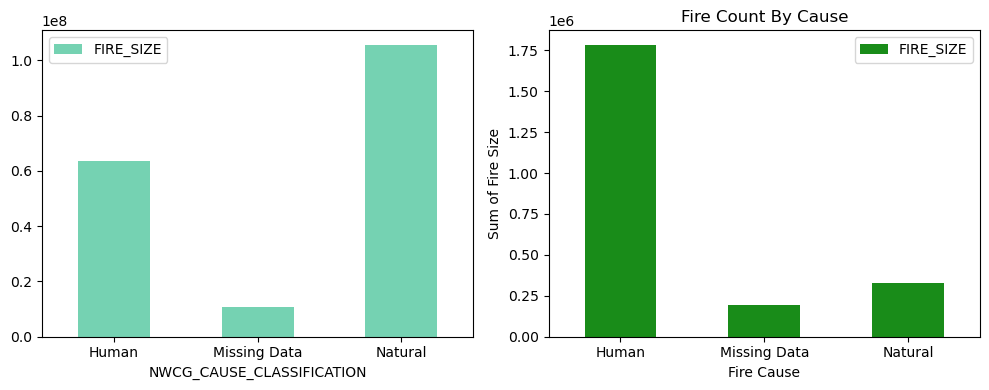

In [24]:
# axes = df.plot(x='Year', y=['Sales1', 'Sales2', 'Sales3'], kind='bar', subplots=True, layout=(1, len(df.columns)-1))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1 = fire_size_cause_df.plot.bar(color="mediumaquamarine", alpha=0.90, align="center", ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xticklabels(["Human","Missing Data","Natural"])
plt.title("Fire Size By Cause")
plt.xlabel("Fire Cause")
plt.ylabel("Sum of Fire Size")

ax2 = fire_count_cause_df.plot.bar(color="green", alpha=0.90, align="center", ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xticklabels(["Human","Missing Data","Natural"])
plt.title("Fire Count By Cause")
plt.xlabel("Fire Cause")
plt.ylabel("Sum of Fire Size")

plt.tight_layout()

plt.show()

In [37]:
fire_count_year_df

,FIRE_YEAR
FIRE_SIZE,
0.00001,1
0.00009,1
0.00010,16
0.00020,4
0.00022,1
...,...
538049.00000,1
558198.30000,1
589368.00000,1


In [7]:
# # Time checker
# start_time = time.time()
# print("--- %s seconds ---" % (time.time() - start_time))